#  Sentiment Analysis: Harnessing Machine Learning to Understand Twitter Buzz

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset/tweets - twitter_kabir_singh_bollywood_movie.csv')

In [ ]:
df

id               Date Created         author  \
0     1.140000e+18  2023-06-30 09:21:00+00:00  SharmaRavitha   
1     1.140000e+18  2023-06-30 09:20:57+00:00  angry_rantman   
2     1.140000e+18  2023-06-30 09:20:22+00:00  pranaytikyani   
3     1.140000e+18  2023-06-30 09:20:00+00:00        ishaqmb   
4     1.140000e+18  2023-06-30 09:15:22+00:00   BipinShukla1   
...            ...                        ...            ...   
9995  1.140000e+18  2023-06-23 10:09:41+00:00  GoldenLocks_x   
9996  1.140000e+18  2023-06-23 10:08:50+00:00  TripathiMansi   
9997  1.140000e+18  2023-06-23 10:08:49+00:00     sanamwazir   
9998  1.140000e+18  2023-06-23 10:08:17+00:00      Nehruvats   
9999  1.140000e+18  2023-06-23 10:08:01+00:00    iSRKsMannat   

                                                  tweet  like lang  \
0      shahidkapoor I am in love with kabir  Kabirsi...     0   en   
1     That's because you are sweet teddy bear guy an...    14   en   
2     I’m obsessed with Bekhayali and Kaise Hua  Kab...     2   en   
3     The character of Kabir needs a psychological t...     2   en   
4     Advani_Kiara You are such a beautiful.person a...     0   en   
...                                                 ...   ...  ...   
9995  P.s. this thread has nothing to do with Kabir ...     0   en   
9996  shahidkapoor  KabirSinghMovie  shahidkapoor4u ...     1   en   
9997  Movie  KabirSingh is obnoxious. It’s full of m...     0   en   
9998  Kabir Singh Movie Review Shahid Kapoor and Kia...     0   en   
9999  Twitter feminists after seeing  KabirSingh fir...     0   en   

                                               text_raw  
0     @shahidkapoor I am in love with kabir @Kabirsi...  
1     That's because you are sweet teddy bear guy an...  
2     I’m obsessed with Bekhayali and Kaise Hua #Kab...  
3     The character of Kabir needs a psychological t...  
4     @Advani_Kiara You are such a beautiful.person ...  
...                                                 ...  
9995  P.s. this thread has nothing to do with Kabir ...  
9996  @shahidkapoor @KabirSinghMovie @shahidkapoor4u...  
9997  Movie #KabirSingh is obnoxious. It’s full of m...  
9998  Kabir Singh Movie Review Shahid Kapoor and Kia...  
9999  Twitter feminists after seeing #KabirSingh fir...  

[10000 rows x 7 columns]

In [ ]:
df.shape

(12596, 16)

In [ ]:
df.columns

Index(['id', 'Date Created', 'author', 'tweet', 'like', 'lang', 'text_raw'], dtype='object')

In [ ]:
df.duplicated().sum()

25

In [ ]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.isnull().sum()

id              0
Date Created    0
author          0
tweet           0
like            0
lang            0
text_raw        0
dtype: int64

In [ ]:
df

id               Date Created         author  \
0     1.140000e+18  2023-06-30 09:21:00+00:00  SharmaRavitha   
1     1.140000e+18  2023-06-30 09:20:57+00:00  angry_rantman   
2     1.140000e+18  2023-06-30 09:20:22+00:00  pranaytikyani   
3     1.140000e+18  2023-06-30 09:20:00+00:00        ishaqmb   
4     1.140000e+18  2023-06-30 09:15:22+00:00   BipinShukla1   
...            ...                        ...            ...   
9995  1.140000e+18  2023-06-23 10:09:41+00:00  GoldenLocks_x   
9996  1.140000e+18  2023-06-23 10:08:50+00:00  TripathiMansi   
9997  1.140000e+18  2023-06-23 10:08:49+00:00     sanamwazir   
9998  1.140000e+18  2023-06-23 10:08:17+00:00      Nehruvats   
9999  1.140000e+18  2023-06-23 10:08:01+00:00    iSRKsMannat   

                                                  tweet  like lang  \
0      shahidkapoor I am in love with kabir  Kabirsi...     0   en   
1     That's because you are sweet teddy bear guy an...    14   en   
2     I’m obsessed with Bekhayali and Kaise Hua  Kab...     2   en   
3     The character of Kabir needs a psychological t...     2   en   
4     Advani_Kiara You are such a beautiful.person a...     0   en   
...                                                 ...   ...  ...   
9995  P.s. this thread has nothing to do with Kabir ...     0   en   
9996  shahidkapoor  KabirSinghMovie  shahidkapoor4u ...     1   en   
9997  Movie  KabirSingh is obnoxious. It’s full of m...     0   en   
9998  Kabir Singh Movie Review Shahid Kapoor and Kia...     0   en   
9999  Twitter feminists after seeing  KabirSingh fir...     0   en   

                                               text_raw  
0     @shahidkapoor I am in love with kabir @Kabirsi...  
1     That's because you are sweet teddy bear guy an...  
2     I’m obsessed with Bekhayali and Kaise Hua #Kab...  
3     The character of Kabir needs a psychological t...  
4     @Advani_Kiara You are such a beautiful.person ...  
...                                                 ...  
9995  P.s. this thread has nothing to do with Kabir ...  
9996  @shahidkapoor @KabirSinghMovie @shahidkapoor4u...  
9997  Movie #KabirSingh is obnoxious. It’s full of m...  
9998  Kabir Singh Movie Review Shahid Kapoor and Kia...  
9999  Twitter feminists after seeing #KabirSingh fir...  

[10000 rows x 7 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            10000 non-null  float64
 1   Date Created  10000 non-null  object 
 2   author        10000 non-null  object 
 3   tweet         10000 non-null  object 
 4   like          10000 non-null  int64  
 5   lang          10000 non-null  object 
 6   text_raw      10000 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 547.0+ KB


In [ ]:
df.describe()

id          like
count  1.000000e+04  10000.000000
mean   1.140000e+18     16.168100
std    0.000000e+00    143.721946
min    1.140000e+18      0.000000
25%    1.140000e+18      0.000000
50%    1.140000e+18      1.000000
75%    1.140000e+18      4.000000
max    1.140000e+18   5714.000000

In [ ]:
df.nunique()

id                 1
Date Created    9830
author          7272
tweet           9806
like             262
lang               1
text_raw        9872
dtype: int64

In [ ]:
df_sorted=df.sort_values(by='like',ascending=False)


In [ ]:
df_sorted.head(10)

id               Date Created         author  \
5985  1.140000e+18  2023-06-25 08:36:33+00:00  ArmaanMalik22   
780   1.140000e+18  2023-06-29 10:37:11+00:00  sonakshisinha   
7912  1.140000e+18  2023-06-24 11:59:44+00:00    FrustIndian   
1929  1.140000e+18  2023-06-28 10:31:03+00:00       filmfare   
4683  1.140000e+18  2023-06-26 06:38:34+00:00       filmfare   
8626  1.140000e+18  2023-06-24 05:13:19+00:00       Riteishd   
5234  1.140000e+18  2023-06-25 18:18:16+00:00  ArmaanMalik22   
6886  1.140000e+18  2023-06-24 14:42:17+00:00     harish2you   
9082  1.140000e+18  2023-06-23 18:17:04+00:00    NakuulMehta   
1543  1.140000e+18  2023-06-28 15:01:16+00:00    kamaalrkhan   

                                                  tweet  like lang  \
5985  Long time since  shahidkapoor got his ACTUAL d...  5714   en   
780   Congratulations  shahidkapoor,  Advani_Kiara a...  5101   en   
7912  Padmavat is just a movie not distortion of his...  4939   en   
1929  How would you rate  Advani_Kiara’s performance...  3978   en   
4683  Looks like getting yourself a ticket for  Kabi...  3334   en   
8626  Wow this is tremendous !! Congratulations dear...  2901   en   
5234  Kiara you have killed it with your simplicity!...  2785   en   
6886  Feeling proud about my brother  imvangasandeep...  2653   en   
9082  There are 99 problems but  shahidkapoor ain't ...  2423   en   
1543  Beautiful, innocent, hot and sexy  Advani_Kiar...  2290   en   

                                               text_raw  
5985  Long time since @shahidkapoor got his ACTUAL d...  
780   Congratulations @shahidkapoor, @Advani_Kiara a...  
7912  Padmavat is just a movie not distortion of his...  
1929  How would you rate @Advani_Kiara’s performance...  
4683  Looks like getting yourself a ticket for #Kabi...  
8626  Wow this is tremendous !! Congratulations dear...  
5234  Kiara you have killed it with your simplicity!...  
6886  Feeling proud about my brother @imvangasandeep...  
9082  There are 99 problems but @shahidkapoor ain't ...  
1543  Beautiful, innocent, hot and sexy @Advani_Kiar...

In [ ]:
df['Date Created']=pd.to_datetime(df['Date Created'])

In [ ]:
df


id               Date Created         author  \
0     1.140000e+18  2023-06-30 09:21:00+00:00  SharmaRavitha   
1     1.140000e+18  2023-06-30 09:20:57+00:00  angry_rantman   
2     1.140000e+18  2023-06-30 09:20:22+00:00  pranaytikyani   
3     1.140000e+18  2023-06-30 09:20:00+00:00        ishaqmb   
4     1.140000e+18  2023-06-30 09:15:22+00:00   BipinShukla1   
...            ...                        ...            ...   
9995  1.140000e+18  2023-06-23 10:09:41+00:00  GoldenLocks_x   
9996  1.140000e+18  2023-06-23 10:08:50+00:00  TripathiMansi   
9997  1.140000e+18  2023-06-23 10:08:49+00:00     sanamwazir   
9998  1.140000e+18  2023-06-23 10:08:17+00:00      Nehruvats   
9999  1.140000e+18  2023-06-23 10:08:01+00:00    iSRKsMannat   

                                                  tweet  like lang  \
0      shahidkapoor I am in love with kabir  Kabirsi...     0   en   
1     That's because you are sweet teddy bear guy an...    14   en   
2     I’m obsessed with Bekhayali and Kaise Hua  Kab...     2   en   
3     The character of Kabir needs a psychological t...     2   en   
4     Advani_Kiara You are such a beautiful.person a...     0   en   
...                                                 ...   ...  ...   
9995  P.s. this thread has nothing to do with Kabir ...     0   en   
9996  shahidkapoor  KabirSinghMovie  shahidkapoor4u ...     1   en   
9997  Movie  KabirSingh is obnoxious. It’s full of m...     0   en   
9998  Kabir Singh Movie Review Shahid Kapoor and Kia...     0   en   
9999  Twitter feminists after seeing  KabirSingh fir...     0   en   

                                               text_raw  
0     @shahidkapoor I am in love with kabir @Kabirsi...  
1     That's because you are sweet teddy bear guy an...  
2     I’m obsessed with Bekhayali and Kaise Hua #Kab...  
3     The character of Kabir needs a psychological t...  
4     @Advani_Kiara You are such a beautiful.person ...  
...                                                 ...  
9995  P.s. this thread has nothing to do with Kabir ...  
9996  @shahidkapoor @KabirSinghMovie @shahidkapoor4u...  
9997  Movie #KabirSingh is obnoxious. It’s full of m...  
9998  Kabir Singh Movie Review Shahid Kapoor and Kia...  
9999  Twitter feminists after seeing #KabirSingh fir...  

[10000 rows x 7 columns]

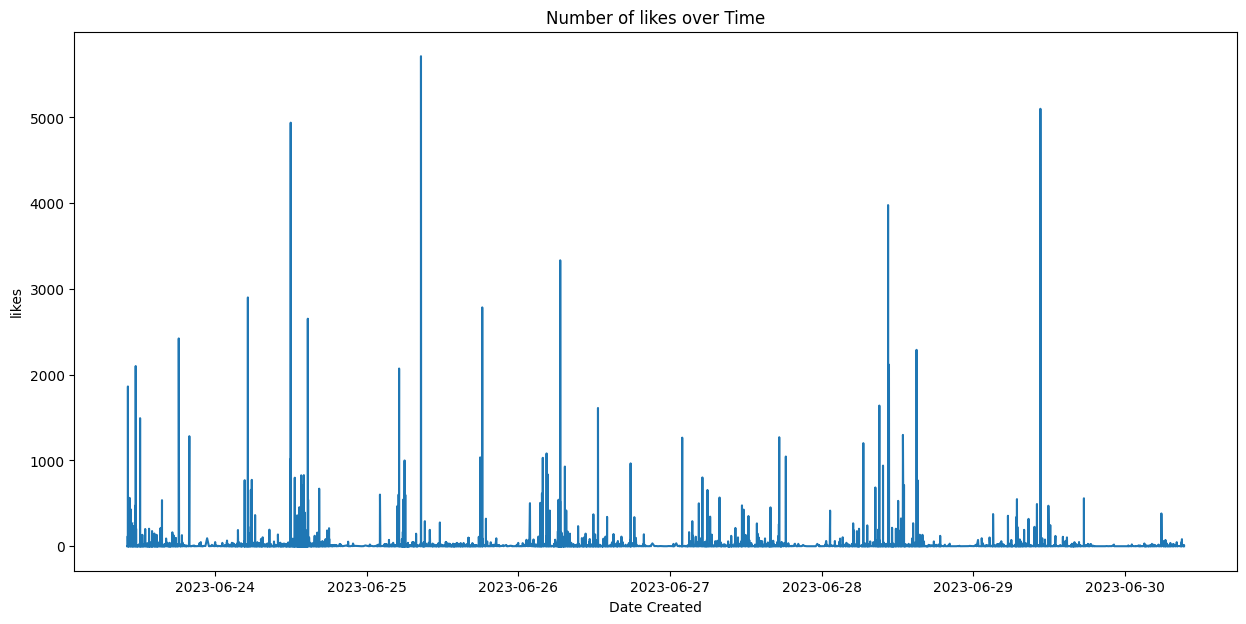

In [ ]:
df_sorted_date = df.sort_values('Date Created')

plt.figure(figsize=[15,7],)

plt.plot(df_sorted_date['Date Created'], df_sorted_date['like'])

plt.xlabel('Date Created')
plt.ylabel('Number of likes')
plt.title('Number of likes over Time')
plt.show()

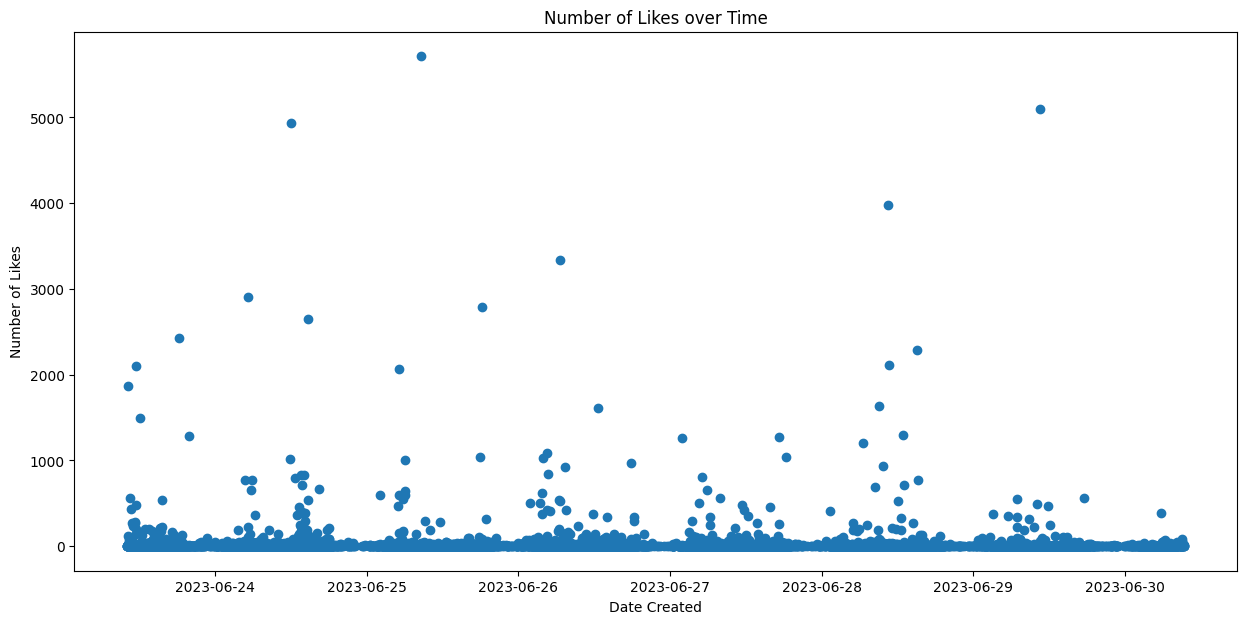

In [ ]:
plt.figure(figsize=[15,7],)

plt.scatter(df_sorted_date['Date Created'], df_sorted_date['like'])

plt.xlabel('Date Created')
plt.ylabel('Number of Likes')
plt.title('Number of Likes over Time')
plt.show()

In [ ]:
import plotly.express as px

fig = px.scatter(df_sorted_date, x='Date Created', y='like', title='Number of Likes over Time')
fig.update_layout(xaxis=dict(title='Date Created'), yaxis=dict(title='Number of Likes'))
fig.show()

In [ ]:
import re
import string
from tqdm.notebook import tqdm
from datetime import datetime
import dateutil.parser

In [ ]:
!pip install -q pyspellchecker
!pip install -q spell-checker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 44.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 948.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 4.3 MB/s eta 0:00:00
ERROR: Cannot install spell-checker==1.1.0, spell-checker==1.2.0, spell-checker==1.2.5, spell-checker==1.3.0, spell-checker==1.4.0, spell-checker==1.5.0, spell-checker==1.6.0 and spell-checker==1.6.1 because these package versions have conflicting dependencies.
ERROR: ResolutionImpossible: for 

In [ ]:
import nltk #natural language tool kit
from spellchecker import SpellChecker
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

In [ ]:
from wordcloud import WordCloud, ImageColorGenerator
from nltk.corpus import stopwords
import random

In [ ]:
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
languages = stopwords.fileids()

# Print the number of supported languages
print("Number of supported languages:", len(languages))

# Print the list of supported languages
print("Supported languages:", languages)

Number of supported languages: 29
Supported languages: ['arabic', 'azerbaijani', 'basque', 'bengali', 'catalan', 'chinese', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hebrew', 'hinglish', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


In [ ]:
from nltk.tokenize import TweetTokenizer

In [ ]:
english_stopwords = stopwords.words('english')
hinglish_stopwords = stopwords.words('hinglish')

In [ ]:
def clean_tweet(tweet):
    tweet = re.sub(r"http\S+|www\S+|@\w+|#\w+", "", tweet)
    tweet = re.sub(r"[^\w\s]", "", tweet)

    # Tokenize the tweet
    tokenizer = TweetTokenizer(preserve_case=False, reduce_len=True, strip_handles=True)
    tokens = tokenizer.tokenize(tweet)

    # Remove stopwords for English and Hinglish
    tokens = [token for token in tokens if token not in english_stopwords and token not in hinglish_stopwords]

    # Remove punctuation and convert to lowercase
    tokens = [token.translate(str.maketrans('', '', string.punctuation)) for token in tokens]
    tokens = [token.lower() for token in tokens]

    # Join tokens back into a string
    cleaned_tweet = ' '.join(tokens)

    return cleaned_tweet

In [ ]:
df['Cleaned_Tweets'] = df['tweet'].apply(clean_tweet)

In [ ]:
df

id               Date Created         author  \
0     1.140000e+18  2023-06-30 09:21:00+00:00  SharmaRavitha   
1     1.140000e+18  2023-06-30 09:20:57+00:00  angry_rantman   
2     1.140000e+18  2023-06-30 09:20:22+00:00  pranaytikyani   
3     1.140000e+18  2023-06-30 09:20:00+00:00        ishaqmb   
4     1.140000e+18  2023-06-30 09:15:22+00:00   BipinShukla1   
...            ...                        ...            ...   
9995  1.140000e+18  2023-06-23 10:09:41+00:00  GoldenLocks_x   
9996  1.140000e+18  2023-06-23 10:08:50+00:00  TripathiMansi   
9997  1.140000e+18  2023-06-23 10:08:49+00:00     sanamwazir   
9998  1.140000e+18  2023-06-23 10:08:17+00:00      Nehruvats   
9999  1.140000e+18  2023-06-23 10:08:01+00:00    iSRKsMannat   

                                                  tweet  like lang  \
0      shahidkapoor I am in love with kabir  Kabirsi...     0   en   
1     That's because you are sweet teddy bear guy an...    14   en   
2     I’m obsessed with Bekhayali and Kaise Hua  Kab...     2   en   
3     The character of Kabir needs a psychological t...     2   en   
4     Advani_Kiara You are such a beautiful.person a...     0   en   
...                                                 ...   ...  ...   
9995  P.s. this thread has nothing to do with Kabir ...     0   en   
9996  shahidkapoor  KabirSinghMovie  shahidkapoor4u ...     1   en   
9997  Movie  KabirSingh is obnoxious. It’s full of m...     0   en   
9998  Kabir Singh Movie Review Shahid Kapoor and Kia...     0   en   
9999  Twitter feminists after seeing  KabirSingh fir...     0   en   

                                               text_raw  \
0     @shahidkapoor I am in love with kabir @Kabirsi...   
1     That's because you are sweet teddy bear guy an...   
2     I’m obsessed with Bekhayali and Kaise Hua #Kab...   
3     The character of Kabir needs a psychological t...   
4     @Advani_Kiara You are such a beautiful.person ...   
...                                                 ...   
9995  P.s. this thread has nothing to do with Kabir ...   
9996  @shahidkapoor @KabirSinghMovie @shahidkapoor4u...   
9997  Movie #KabirSingh is obnoxious. It’s full of m...   
9998  Kabir Singh Movie Review Shahid Kapoor and Kia...   
9999  Twitter feminists after seeing #KabirSingh fir...   

                                         Cleaned_Tweets  
0     shahidkapoor love kabir kabirsingh superb movi...  
1     sweet teddy bear guy chicks magnet behave kabi...  
2                      im obsessed bekhayali kabirsingh  
3     character kabir psychological treatment instea...  
4     advanikiara beautifulperson talented actor sim...  
...                                                 ...  
9995                    ps thread kabir singh men trash  
9996  shahidkapoor kabirsinghmovie shahidkapoor 4u s...  
9997  movie kabirsingh obnoxious full misogyny toxic...  
9998  kabir singh movie review shahid kapoor kiara a...  
9999  twitter feminists kabirsingh day reportspictwi...  

[10000 rows x 8 columns]

In [ ]:
def clean_text(text):
    text = text.lower()
    return text.strip()

In [ ]:
df.Cleaned_Tweets = df.Cleaned_Tweets.apply(lambda x: clean_text(x))

In [ ]:
def tokenization(text):
    tokens = re.split('W+',text)
    return tokens

#re->weak

In [ ]:
df.Cleaned_Tweets = df.Cleaned_Tweets.apply(lambda x: tokenization(x))

In [ ]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
def lemmatizer(text):
    lemm_text = "".join([wordnet_lemmatizer.lemmatize(word) for word in text])
    return lemm_text

In [ ]:
df.Cleaned_Tweets = df.Cleaned_Tweets.apply(lambda x: lemmatizer(x))

In [ ]:
def remove_digits(text):
    clean_text = re.sub(r"\b[0-9]+\b\s*", "", text)
    return(text)

In [ ]:
df.Cleaned_Tweets = df.Cleaned_Tweets.apply(lambda x: remove_digits(x))

In [ ]:
def remove_digits1(sample_text):
    clean_text = " ".join([w for w in sample_text.split() if not w.isdigit()])
    return(clean_text)

In [ ]:
df.Cleaned_Tweets = df.Cleaned_Tweets.apply(lambda x: remove_digits1(x))

In [ ]:
!pip install -q langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 12.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
from langdetect import detect

def detect_language(text):
    try:
        lang = detect(text)
        return lang
    except:
        return None

df['Language'] = df['Cleaned_Tweets'].apply(detect_language)

In [ ]:
df

id               Date Created         author  \
0     1.140000e+18  2023-06-30 09:21:00+00:00  SharmaRavitha   
1     1.140000e+18  2023-06-30 09:20:57+00:00  angry_rantman   
2     1.140000e+18  2023-06-30 09:20:22+00:00  pranaytikyani   
3     1.140000e+18  2023-06-30 09:20:00+00:00        ishaqmb   
4     1.140000e+18  2023-06-30 09:15:22+00:00   BipinShukla1   
...            ...                        ...            ...   
9995  1.140000e+18  2023-06-23 10:09:41+00:00  GoldenLocks_x   
9996  1.140000e+18  2023-06-23 10:08:50+00:00  TripathiMansi   
9997  1.140000e+18  2023-06-23 10:08:49+00:00     sanamwazir   
9998  1.140000e+18  2023-06-23 10:08:17+00:00      Nehruvats   
9999  1.140000e+18  2023-06-23 10:08:01+00:00    iSRKsMannat   

                                                  tweet  like lang  \
0      shahidkapoor I am in love with kabir  Kabirsi...     0   en   
1     That's because you are sweet teddy bear guy an...    14   en   
2     I’m obsessed with Bekhayali and Kaise Hua  Kab...     2   en   
3     The character of Kabir needs a psychological t...     2   en   
4     Advani_Kiara You are such a beautiful.person a...     0   en   
...                                                 ...   ...  ...   
9995  P.s. this thread has nothing to do with Kabir ...     0   en   
9996  shahidkapoor  KabirSinghMovie  shahidkapoor4u ...     1   en   
9997  Movie  KabirSingh is obnoxious. It’s full of m...     0   en   
9998  Kabir Singh Movie Review Shahid Kapoor and Kia...     0   en   
9999  Twitter feminists after seeing  KabirSingh fir...     0   en   

                                               text_raw  \
0     @shahidkapoor I am in love with kabir @Kabirsi...   
1     That's because you are sweet teddy bear guy an...   
2     I’m obsessed with Bekhayali and Kaise Hua #Kab...   
3     The character of Kabir needs a psychological t...   
4     @Advani_Kiara You are such a beautiful.person ...   
...                                                 ...   
9995  P.s. this thread has nothing to do with Kabir ...   
9996  @shahidkapoor @KabirSinghMovie @shahidkapoor4u...   
9997  Movie #KabirSingh is obnoxious. It’s full of m...   
9998  Kabir Singh Movie Review Shahid Kapoor and Kia...   
9999  Twitter feminists after seeing #KabirSingh fir...   

                                         Cleaned_Tweets Language  
0     shahidkapoor love kabir kabirsingh superb movi...       en  
1     sweet teddy bear guy chicks magnet behave kabi...       en  
2                      im obsessed bekhayali kabirsingh       tl  
3     character kabir psychological treatment instea...       en  
4     advanikiara beautifulperson talented actor sim...       en  
...                                                 ...      ...  
9995                    ps thread kabir singh men trash       en  
9996  shahidkapoor kabirsinghmovie shahidkapoor 4u s...       en  
9997  movie kabirsingh obnoxious full misogyny toxic...       en  
9998  kabir singh movie review shahid kapoor kiara a...       en  
9999  twitter feminists kabirsingh day reportspictwi...       en  

[10000 rows x 9 columns]

In [ ]:
df1 = df.copy()

In [ ]:
df1['english_tweets'] = df[df['Language'] == 'en']['Cleaned_Tweets']

In [ ]:
df1

id               Date Created         author  \
0     1.140000e+18  2023-06-30 09:21:00+00:00  SharmaRavitha   
1     1.140000e+18  2023-06-30 09:20:57+00:00  angry_rantman   
2     1.140000e+18  2023-06-30 09:20:22+00:00  pranaytikyani   
3     1.140000e+18  2023-06-30 09:20:00+00:00        ishaqmb   
4     1.140000e+18  2023-06-30 09:15:22+00:00   BipinShukla1   
...            ...                        ...            ...   
9995  1.140000e+18  2023-06-23 10:09:41+00:00  GoldenLocks_x   
9996  1.140000e+18  2023-06-23 10:08:50+00:00  TripathiMansi   
9997  1.140000e+18  2023-06-23 10:08:49+00:00     sanamwazir   
9998  1.140000e+18  2023-06-23 10:08:17+00:00      Nehruvats   
9999  1.140000e+18  2023-06-23 10:08:01+00:00    iSRKsMannat   

                                                  tweet  like lang  \
0      shahidkapoor I am in love with kabir  Kabirsi...     0   en   
1     That's because you are sweet teddy bear guy an...    14   en   
2     I’m obsessed with Bekhayali and Kaise Hua  Kab...     2   en   
3     The character of Kabir needs a psychological t...     2   en   
4     Advani_Kiara You are such a beautiful.person a...     0   en   
...                                                 ...   ...  ...   
9995  P.s. this thread has nothing to do with Kabir ...     0   en   
9996  shahidkapoor  KabirSinghMovie  shahidkapoor4u ...     1   en   
9997  Movie  KabirSingh is obnoxious. It’s full of m...     0   en   
9998  Kabir Singh Movie Review Shahid Kapoor and Kia...     0   en   
9999  Twitter feminists after seeing  KabirSingh fir...     0   en   

                                               text_raw  \
0     @shahidkapoor I am in love with kabir @Kabirsi...   
1     That's because you are sweet teddy bear guy an...   
2     I’m obsessed with Bekhayali and Kaise Hua #Kab...   
3     The character of Kabir needs a psychological t...   
4     @Advani_Kiara You are such a beautiful.person ...   
...                                                 ...   
9995  P.s. this thread has nothing to do with Kabir ...   
9996  @shahidkapoor @KabirSinghMovie @shahidkapoor4u...   
9997  Movie #KabirSingh is obnoxious. It’s full of m...   
9998  Kabir Singh Movie Review Shahid Kapoor and Kia...   
9999  Twitter feminists after seeing #KabirSingh fir...   

                                         Cleaned_Tweets Language  \
0     shahidkapoor love kabir kabirsingh superb movi...       en   
1     sweet teddy bear guy chicks magnet behave kabi...       en   
2                      im obsessed bekhayali kabirsingh       tl   
3     character kabir psychological treatment instea...       en   
4     advanikiara beautifulperson talented actor sim...       en   
...                                                 ...      ...   
9995                    ps thread kabir singh men trash       en   
9996  shahidkapoor kabirsinghmovie shahidkapoor 4u s...       en   
9997  movie kabirsingh obnoxious full misogyny toxic...       en   
9998  kabir singh movie review shahid kapoor kiara a...       en   
9999  twitter feminists kabirsingh day reportspictwi...       en   

                                         english_tweets  
0     shahidkapoor love kabir kabirsingh superb movi...  
1     sweet teddy bear guy chicks magnet behave kabi...  
2                                                   NaN  
3     character kabir psychological treatment instea...  
4     advanikiara beautifulperson talented actor sim...  
...                                                 ...  
9995                    ps thread kabir singh men trash  
9996  shahidkapoor kabirsinghmovie shahidkapoor 4u s...  
9997  movie kabirsingh obnoxious full misogyny toxic...  
9998  kabir singh movie review shahid kapoor kiara a...  
9999  twitter feminists kabirsingh day reportspictwi...  

[10000 rows x 10 columns]

In [ ]:
df1 = df1.dropna()

In [ ]:
df1

id               Date Created         author  \
0     1.140000e+18  2023-06-30 09:21:00+00:00  SharmaRavitha   
1     1.140000e+18  2023-06-30 09:20:57+00:00  angry_rantman   
3     1.140000e+18  2023-06-30 09:20:00+00:00        ishaqmb   
4     1.140000e+18  2023-06-30 09:15:22+00:00   BipinShukla1   
5     1.140000e+18  2023-06-30 09:08:27+00:00   ranveersbabe   
...            ...                        ...            ...   
9995  1.140000e+18  2023-06-23 10:09:41+00:00  GoldenLocks_x   
9996  1.140000e+18  2023-06-23 10:08:50+00:00  TripathiMansi   
9997  1.140000e+18  2023-06-23 10:08:49+00:00     sanamwazir   
9998  1.140000e+18  2023-06-23 10:08:17+00:00      Nehruvats   
9999  1.140000e+18  2023-06-23 10:08:01+00:00    iSRKsMannat   

                                                  tweet  like lang  \
0      shahidkapoor I am in love with kabir  Kabirsi...     0   en   
1     That's because you are sweet teddy bear guy an...    14   en   
3     The character of Kabir needs a psychological t...     2   en   
4     Advani_Kiara You are such a beautiful.person a...     0   en   
5     I've been doing a bit of searching and have fo...    17   en   
...                                                 ...   ...  ...   
9995  P.s. this thread has nothing to do with Kabir ...     0   en   
9996  shahidkapoor  KabirSinghMovie  shahidkapoor4u ...     1   en   
9997  Movie  KabirSingh is obnoxious. It’s full of m...     0   en   
9998  Kabir Singh Movie Review Shahid Kapoor and Kia...     0   en   
9999  Twitter feminists after seeing  KabirSingh fir...     0   en   

                                               text_raw  \
0     @shahidkapoor I am in love with kabir @Kabirsi...   
1     That's because you are sweet teddy bear guy an...   
3     The character of Kabir needs a psychological t...   
4     @Advani_Kiara You are such a beautiful.person ...   
5     I've been doing a bit of searching and have fo...   
...                                                 ...   
9995  P.s. this thread has nothing to do with Kabir ...   
9996  @shahidkapoor @KabirSinghMovie @shahidkapoor4u...   
9997  Movie #KabirSingh is obnoxious. It’s full of m...   
9998  Kabir Singh Movie Review Shahid Kapoor and Kia...   
9999  Twitter feminists after seeing #KabirSingh fir...   

                                         Cleaned_Tweets Language  \
0     shahidkapoor love kabir kabirsingh superb movi...       en   
1     sweet teddy bear guy chicks magnet behave kabi...       en   
3     character kabir psychological treatment instea...       en   
4     advanikiara beautifulperson talented actor sim...       en   
5     ive bit searching found unwarranted hate ranve...       en   
...                                                 ...      ...   
9995                    ps thread kabir singh men trash       en   
9996  shahidkapoor kabirsinghmovie shahidkapoor 4u s...       en   
9997  movie kabirsingh obnoxious full misogyny toxic...       en   
9998  kabir singh movie review shahid kapoor kiara a...       en   
9999  twitter feminists kabirsingh day reportspictwi...       en   

                                         english_tweets  
0     shahidkapoor love kabir kabirsingh superb movi...  
1     sweet teddy bear guy chicks magnet behave kabi...  
3     character kabir psychological treatment instea...  
4     advanikiara beautifulperson talented actor sim...  
5     ive bit searching found unwarranted hate ranve...  
...                                                 ...  
9995                    ps thread kabir singh men trash  
9996  shahidkapoor kabirsinghmovie shahidkapoor 4u s...  
9997  movie kabirsingh obnoxious full misogyny toxic...  
9998  kabir singh movie review shahid kapoor kiara a...  
9999  twitter feminists kabirsingh day reportspictwi...  

[8495 rows x 10 columns]

In [ ]:
df1.nunique()

id                   1
Date Created      8378
author            6270
tweet             8352
like               249
lang                 1
text_raw          8406
Cleaned_Tweets    8289
Language             1
english_tweets    8289
dtype: int64

In [ ]:
df1['Date Created'] = pd.to_datetime(df1['Date Created'], utc=True)
df1['Year'] = df1['Date Created'].dt.year
df1['Month'] = df1['Date Created'].dt.month
df1['Day'] = df1['Date Created'].dt.day


In [ ]:
df1['Time'] = df1['Date Created'].dt.time

In [ ]:
df1['Tweet_Length'] = df1['english_tweets'].str.len()

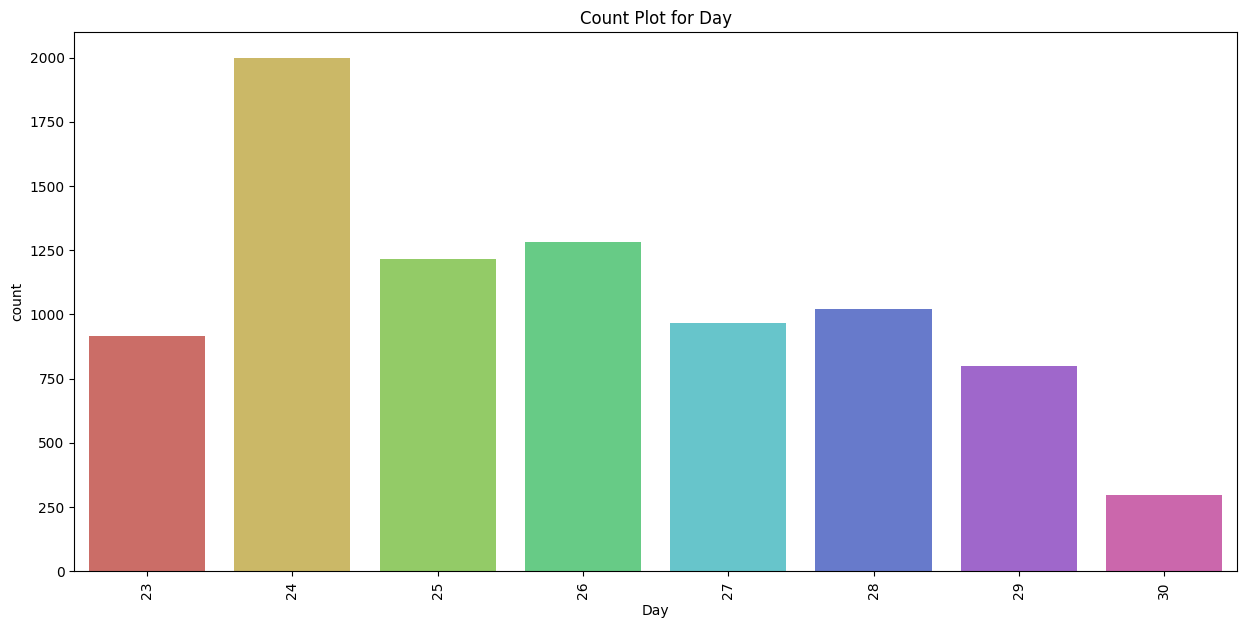

In [ ]:
plt.figure(figsize=[15,7],)
plt.title('Count Plot for Day')
sns.countplot(x = 'Day', data = df1, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

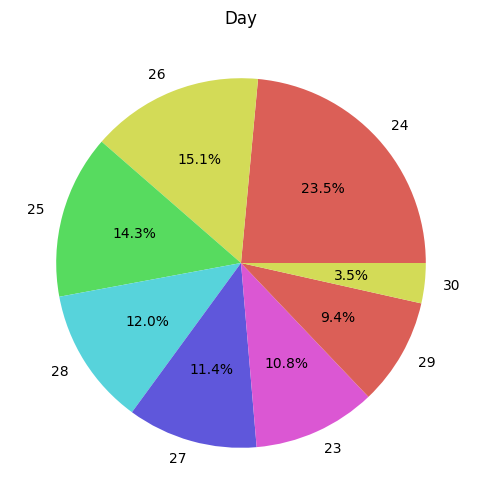

In [ ]:
plt.figure(figsize=(15, 6))
counts = df1['Day'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=sns.color_palette('hls'))
plt.title('Day')
plt.show()

In [ ]:
import plotly.graph_objects as go

In [ ]:
fig = go.Figure(data=[go.Bar(x=df1['Day'].value_counts().index, y=df1['Day'].value_counts())])
fig.update_layout(
        title= 'Day',
        xaxis_title="Categories",
        yaxis_title="Count"
    )
fig.show()

In [ ]:
counts = df1['Day'].value_counts()
fig = go.Figure(data=[go.Pie(labels=counts.index, values=counts)])
fig.update_layout(title= 'Day')
fig.show()

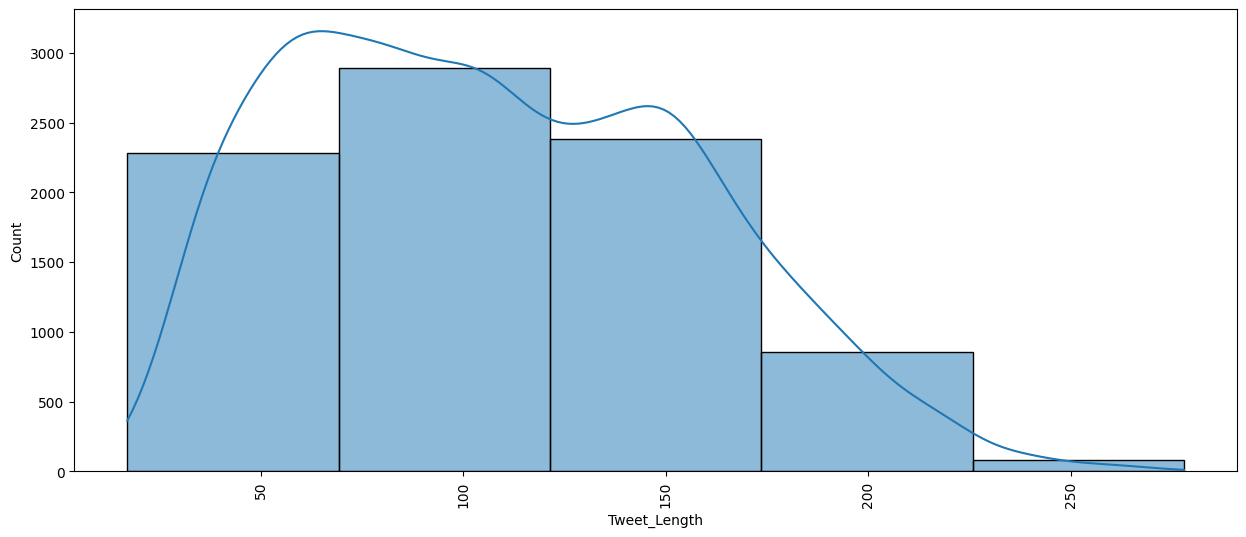

In [ ]:
plt.figure(figsize=(15,6))
sns.histplot(df1['Tweet_Length'], kde = True, bins = 5, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

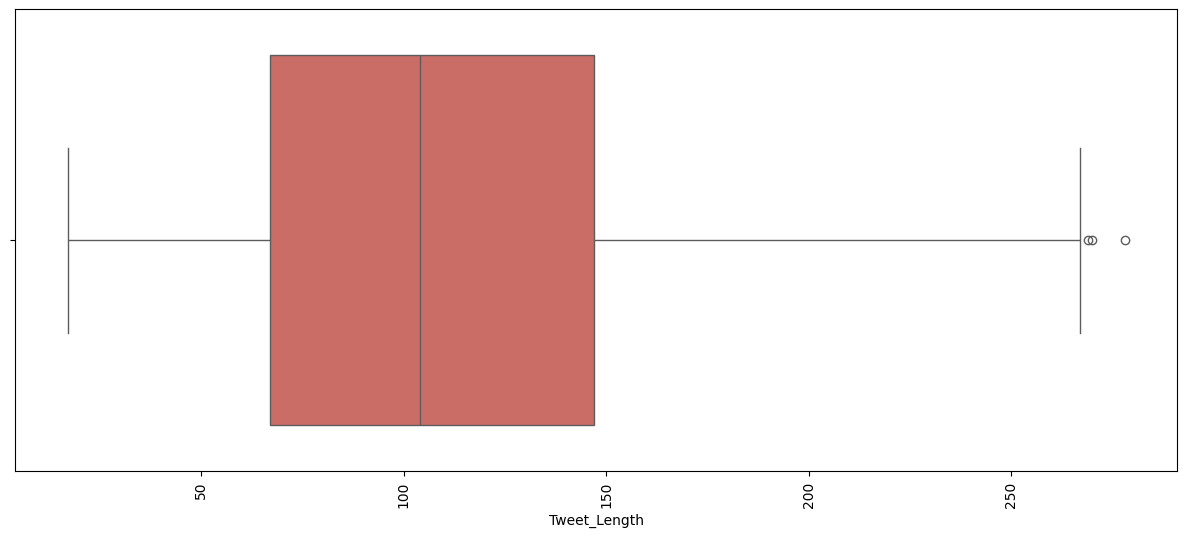

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot(x=df1['Tweet_Length'], data = df, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
import plotly.express as px

fig = px.histogram(df1, x='Tweet_Length', nbins=20, histnorm='probability density')
fig.update_layout(title=f"Histogram of Tweet Length", xaxis_title='Tweet Length', yaxis_title="Probability Density")
fig.show()

In [ ]:
fig = px.box(df1, y='Tweet_Length')
fig.update_layout(title=f"Box Plot of Tweet Length", yaxis_title='Tweet_Length')
fig.show()

In [ ]:
spell = SpellChecker()

In [ ]:
def label_sentiment(x:float):
    if x < -0.05 : return 'negative'
    if x > 0.35 : return 'positive'
    return 'neutral'

In [ ]:
sia = SIA()

In [ ]:
df1['sentiment'] = [sia.polarity_scores(x)['compound'] for x in tqdm(df1['english_tweets'])]
df1['overall_sentiment'] = df1['sentiment'].apply(label_sentiment);

  0%|          | 0/8495 [00:00<?, ?it/s]

In [ ]:
df1

id              Date Created         author  \
0     1.140000e+18 2023-06-30 09:21:00+00:00  SharmaRavitha   
1     1.140000e+18 2023-06-30 09:20:57+00:00  angry_rantman   
3     1.140000e+18 2023-06-30 09:20:00+00:00        ishaqmb   
4     1.140000e+18 2023-06-30 09:15:22+00:00   BipinShukla1   
5     1.140000e+18 2023-06-30 09:08:27+00:00   ranveersbabe   
...            ...                       ...            ...   
9995  1.140000e+18 2023-06-23 10:09:41+00:00  GoldenLocks_x   
9996  1.140000e+18 2023-06-23 10:08:50+00:00  TripathiMansi   
9997  1.140000e+18 2023-06-23 10:08:49+00:00     sanamwazir   
9998  1.140000e+18 2023-06-23 10:08:17+00:00      Nehruvats   
9999  1.140000e+18 2023-06-23 10:08:01+00:00    iSRKsMannat   

                                                  tweet  like lang  \
0      shahidkapoor I am in love with kabir  Kabirsi...     0   en   
1     That's because you are sweet teddy bear guy an...    14   en   
3     The character of Kabir needs a psychological t...     2   en   
4     Advani_Kiara You are such a beautiful.person a...     0   en   
5     I've been doing a bit of searching and have fo...    17   en   
...                                                 ...   ...  ...   
9995  P.s. this thread has nothing to do with Kabir ...     0   en   
9996  shahidkapoor  KabirSinghMovie  shahidkapoor4u ...     1   en   
9997  Movie  KabirSingh is obnoxious. It’s full of m...     0   en   
9998  Kabir Singh Movie Review Shahid Kapoor and Kia...     0   en   
9999  Twitter feminists after seeing  KabirSingh fir...     0   en   

                                               text_raw  \
0     @shahidkapoor I am in love with kabir @Kabirsi...   
1     That's because you are sweet teddy bear guy an...   
3     The character of Kabir needs a psychological t...   
4     @Advani_Kiara You are such a beautiful.person ...   
5     I've been doing a bit of searching and have fo...   
...                                                 ...   
9995  P.s. this thread has nothing to do with Kabir ...   
9996  @shahidkapoor @KabirSinghMovie @shahidkapoor4u...   
9997  Movie #KabirSingh is obnoxious. It’s full of m...   
9998  Kabir Singh Movie Review Shahid Kapoor and Kia...   
9999  Twitter feminists after seeing #KabirSingh fir...   

                                         Cleaned_Tweets Language  \
0     shahidkapoor love kabir kabirsingh superb movi...       en   
1     sweet teddy bear guy chicks magnet behave kabi...       en   
3     character kabir psychological treatment instea...       en   
4     advanikiara beautifulperson talented actor sim...       en   
5     ive bit searching found unwarranted hate ranve...       en   
...                                                 ...      ...   
9995                    ps thread kabir singh men trash       en   
9996  shahidkapoor kabirsinghmovie shahidkapoor 4u s...       en   
9997  movie kabirsingh obnoxious full misogyny toxic...       en   
9998  kabir singh movie review shahid kapoor kiara a...       en   
9999  twitter feminists kabirsingh day reportspictwi...       en   

                                         english_tweets  Tweet_Length  Year  \
0     shahidkapoor love kabir kabirsingh superb movi...           123  2023   
1     sweet teddy bear guy chicks magnet behave kabi...            68  2023   
3     character kabir psychological treatment instea...           227  2023   
4     advanikiara beautifulperson talented actor sim...           108  2023   
5     ive bit searching found unwarranted hate ranve...           151  2023   
...                                                 ...           ...   ...   
9995                    ps thread kabir singh men trash            31  2023   
9996  shahidkapoor kabirsinghmovie shahidkapoor 4u s...           114  2023   
9997  movie kabirsingh obnoxious full misogyny toxic...            74  2023   
9998  kabir singh movie review shahid kapoor kiara a...            79  2023   
9999  twitter feminists

In [ ]:
df1['overall_sentiment'].unique()

array(['positive', 'negative', 'neutral'], dtype=object)

In [ ]:
df1['overall_sentiment'].value_counts()

overall_sentiment
positive    3758
neutral     2996
negative    1741
Name: count, dtype: int64

In [ ]:
df1.shape

(8495, 17)

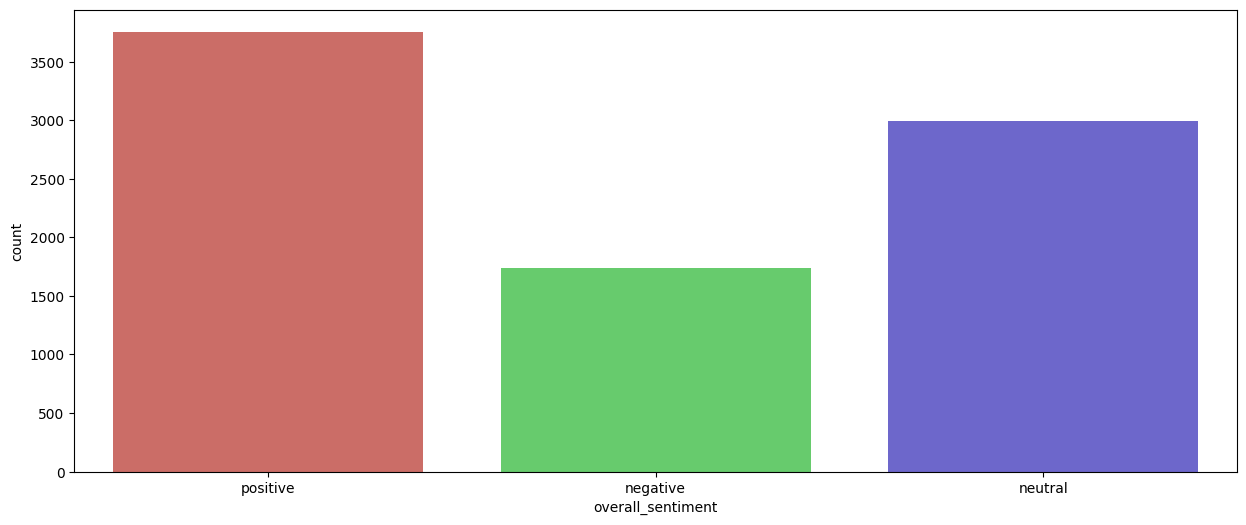

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x=df1['overall_sentiment'], data = df1, palette = 'hls')
plt.xticks(rotation = 0)
plt.show()

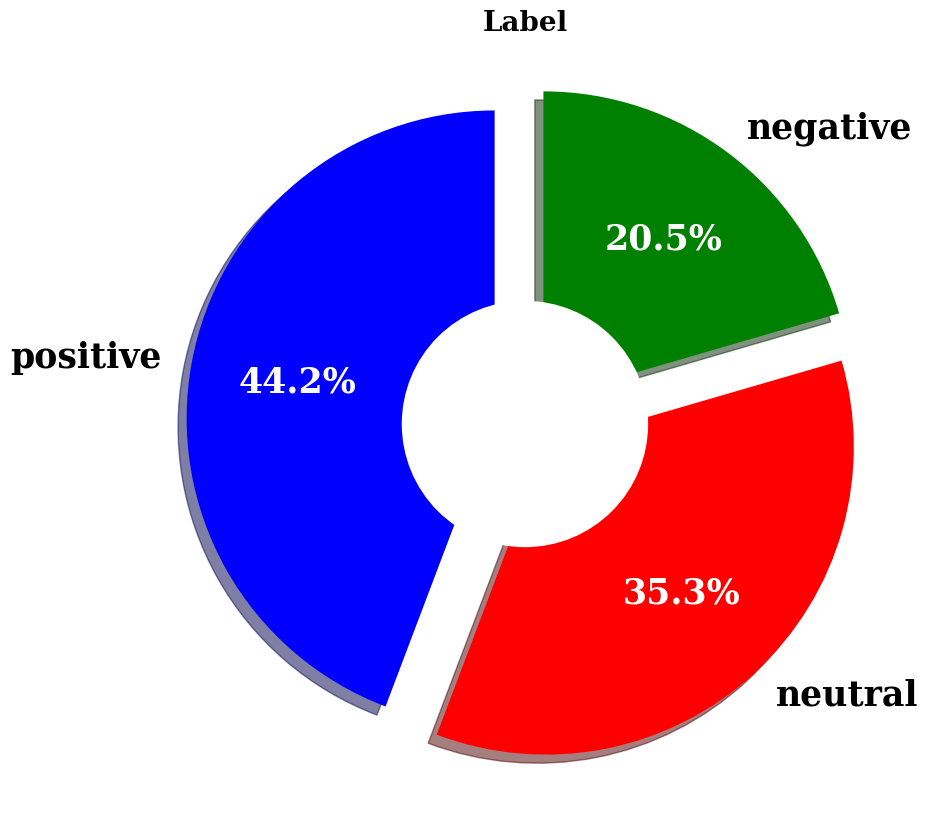

In [ ]:
label_data = df1['overall_sentiment'].value_counts()

explode = (0.1, 0.1, 0.1)
plt.figure(figsize=(14, 10))
patches, texts, pcts = plt.pie(label_data,
                               labels = label_data.index,
                               colors = ['blue', 'red', 'green'],
                               pctdistance = 0.65,
                               shadow = True,
                               startangle = 90,
                               explode = explode,
                               autopct = '%1.1f%%',
                               textprops={ 'fontsize': 25,
                                           'color': 'black',
                                           'weight': 'bold',
                                           'family': 'serif' })
plt.setp(pcts, color='white')

hfont = {'fontname':'serif', 'weight': 'bold'}
plt.title('Label', size=20, **hfont)

centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

In [ ]:
fig = go.Figure(data=[go.Bar(x=df1['overall_sentiment'].value_counts().index, y=df1['overall_sentiment'].value_counts())])
fig.update_layout(
        title= 'Overall Sentiment',
        xaxis_title="Categories",
        yaxis_title="Count"
    )
fig.show()

In [ ]:
counts = df1['overall_sentiment'].value_counts()
fig = go.Figure(data=[go.Pie(labels=counts.index, values=counts)])
fig.update_layout(title= 'Overall Sentiment')
fig.show()

In [ ]:
df1

id              Date Created         author  \
0     1.140000e+18 2023-06-30 09:21:00+00:00  SharmaRavitha   
1     1.140000e+18 2023-06-30 09:20:57+00:00  angry_rantman   
3     1.140000e+18 2023-06-30 09:20:00+00:00        ishaqmb   
4     1.140000e+18 2023-06-30 09:15:22+00:00   BipinShukla1   
5     1.140000e+18 2023-06-30 09:08:27+00:00   ranveersbabe   
...            ...                       ...            ...   
9995  1.140000e+18 2023-06-23 10:09:41+00:00  GoldenLocks_x   
9996  1.140000e+18 2023-06-23 10:08:50+00:00  TripathiMansi   
9997  1.140000e+18 2023-06-23 10:08:49+00:00     sanamwazir   
9998  1.140000e+18 2023-06-23 10:08:17+00:00      Nehruvats   
9999  1.140000e+18 2023-06-23 10:08:01+00:00    iSRKsMannat   

                                                  tweet  like lang  \
0      shahidkapoor I am in love with kabir  Kabirsi...     0   en   
1     That's because you are sweet teddy bear guy an...    14   en   
3     The character of Kabir needs a psychological t...     2   en   
4     Advani_Kiara You are such a beautiful.person a...     0   en   
5     I've been doing a bit of searching and have fo...    17   en   
...                                                 ...   ...  ...   
9995  P.s. this thread has nothing to do with Kabir ...     0   en   
9996  shahidkapoor  KabirSinghMovie  shahidkapoor4u ...     1   en   
9997  Movie  KabirSingh is obnoxious. It’s full of m...     0   en   
9998  Kabir Singh Movie Review Shahid Kapoor and Kia...     0   en   
9999  Twitter feminists after seeing  KabirSingh fir...     0   en   

                                               text_raw  \
0     @shahidkapoor I am in love with kabir @Kabirsi...   
1     That's because you are sweet teddy bear guy an...   
3     The character of Kabir needs a psychological t...   
4     @Advani_Kiara You are such a beautiful.person ...   
5     I've been doing a bit of searching and have fo...   
...                                                 ...   
9995  P.s. this thread has nothing to do with Kabir ...   
9996  @shahidkapoor @KabirSinghMovie @shahidkapoor4u...   
9997  Movie #KabirSingh is obnoxious. It’s full of m...   
9998  Kabir Singh Movie Review Shahid Kapoor and Kia...   
9999  Twitter feminists after seeing #KabirSingh fir...   

                                         Cleaned_Tweets Language  \
0     shahidkapoor love kabir kabirsingh superb movi...       en   
1     sweet teddy bear guy chicks magnet behave kabi...       en   
3     character kabir psychological treatment instea...       en   
4     advanikiara beautifulperson talented actor sim...       en   
5     ive bit searching found unwarranted hate ranve...       en   
...                                                 ...      ...   
9995                    ps thread kabir singh men trash       en   
9996  shahidkapoor kabirsinghmovie shahidkapoor 4u s...       en   
9997  movie kabirsingh obnoxious full misogyny toxic...       en   
9998  kabir singh movie review shahid kapoor kiara a...       en   
9999  twitter feminists kabirsingh day reportspictwi...       en   

                                         english_tweets  Tweet_Length  Year  \
0     shahidkapoor love kabir kabirsingh superb movi...           123  2023   
1     sweet teddy bear guy chicks magnet behave kabi...            68  2023   
3     character kabir psychological treatment instea...           227  2023   
4     advanikiara beautifulperson talented actor sim...           108  2023   
5     ive bit searching found unwarranted hate ranve...           151  2023   
...                                                 ...           ...   ...   
9995                    ps thread kabir singh men trash            31  2023   
9996  shahidkapoor kabirsinghmovie shahidkapoor 4u s...           114  2023   
9997  movie kabirsingh obnoxious full misogyny toxic...            74  2023   
9998  kabir singh movie review shahid kapoor kiara a...            79  2023   
9999  twitter feminists

In [ ]:
df2 = df1[['english_tweets', 'overall_sentiment']]

In [ ]:
df2

english_tweets overall_sentiment
0     shahidkapoor love kabir kabirsingh superb movi...          positive
1     sweet teddy bear guy chicks magnet behave kabi...          positive
3     character kabir psychological treatment instea...          positive
4     advanikiara beautifulperson talented actor sim...          positive
5     ive bit searching found unwarranted hate ranve...          negative
...                                                 ...               ...
9995                    ps thread kabir singh men trash           neutral
9996  shahidkapoor kabirsinghmovie shahidkapoor 4u s...          positive
9997  movie kabirsingh obnoxious full misogyny toxic...          negative
9998  kabir singh movie review shahid kapoor kiara a...          positive
9999  twitter feminists kabirsingh day reportspictwi...           neutral

[8495 rows x 2 columns]

In [ ]:
def clean_text(text):
    # Remove non-alphabetic characters and convert to lowercase
    cleaned_text = re.sub('[^a-zA-Z]', ' ', text).lower()
    # Remove extra white spaces
    cleaned_text = re.sub('\s+', ' ', cleaned_text).strip()
    # Split the text into words
    words = cleaned_text.split()
    # Join the words back into a string|
    cleaned_text = ' '.join(words)
    return cleaned_text

# Apply the clean_text function to the 'english_tweets' column
df2['Cleaned_English_Tweets'] = df2['english_tweets'].apply(clean_text)

In [ ]:
df2

english_tweets overall_sentiment  \
0     shahidkapoor love kabir kabirsingh superb movi...          positive   
1     sweet teddy bear guy chicks magnet behave kabi...          positive   
3     character kabir psychological treatment instea...          positive   
4     advanikiara beautifulperson talented actor sim...          positive   
5     ive bit searching found unwarranted hate ranve...          negative   
...                                                 ...               ...   
9995                    ps thread kabir singh men trash           neutral   
9996  shahidkapoor kabirsinghmovie shahidkapoor 4u s...          positive   
9997  movie kabirsingh obnoxious full misogyny toxic...          negative   
9998  kabir singh movie review shahid kapoor kiara a...          positive   
9999  twitter feminists kabirsingh day reportspictwi...           neutral   

                                 Cleaned_English_Tweets  
0     shahidkapoor love kabir kabirsingh superb movi...  
1     sweet teddy bear guy chicks magnet behave kabi...  
3     character kabir psychological treatment instea...  
4     advanikiara beautifulperson talented actor sim...  
5     ive bit searching found unwarranted hate ranve...  
...                                                 ...  
9995                    ps thread kabir singh men trash  
9996  shahidkapoor kabirsinghmovie shahidkapoor u se...  
9997  movie kabirsingh obnoxious full misogyny toxic...  
9998  kabir singh movie review shahid kapoor kiara a...  
9999  twitter feminists kabirsingh day reportspictwi...  

[8495 rows x 3 columns]

In [ ]:
df3 = df2[['Cleaned_English_Tweets', 'overall_sentiment']]

In [ ]:
df3

Cleaned_English_Tweets overall_sentiment
0     shahidkapoor love kabir kabirsingh superb movi...          positive
1     sweet teddy bear guy chicks magnet behave kabi...          positive
3     character kabir psychological treatment instea...          positive
4     advanikiara beautifulperson talented actor sim...          positive
5     ive bit searching found unwarranted hate ranve...          negative
...                                                 ...               ...
9995                    ps thread kabir singh men trash           neutral
9996  shahidkapoor kabirsinghmovie shahidkapoor u se...          positive
9997  movie kabirsingh obnoxious full misogyny toxic...          negative
9998  kabir singh movie review shahid kapoor kiara a...          positive
9999  twitter feminists kabirsingh day reportspictwi...           neutral

[8495 rows x 2 columns]

In [ ]:
non_meaningful_words = ['cr', 'amp', 'rs', 'u', 'l']

def remove_non_meaningful_words(text):
    tokens = text.split()
    filtered_tokens = [token for token in tokens if token not in non_meaningful_words]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

df3['Cleaned_English_Tweets'] = df3['Cleaned_English_Tweets'].apply(remove_non_meaningful_words)

In [ ]:
import wordcloud

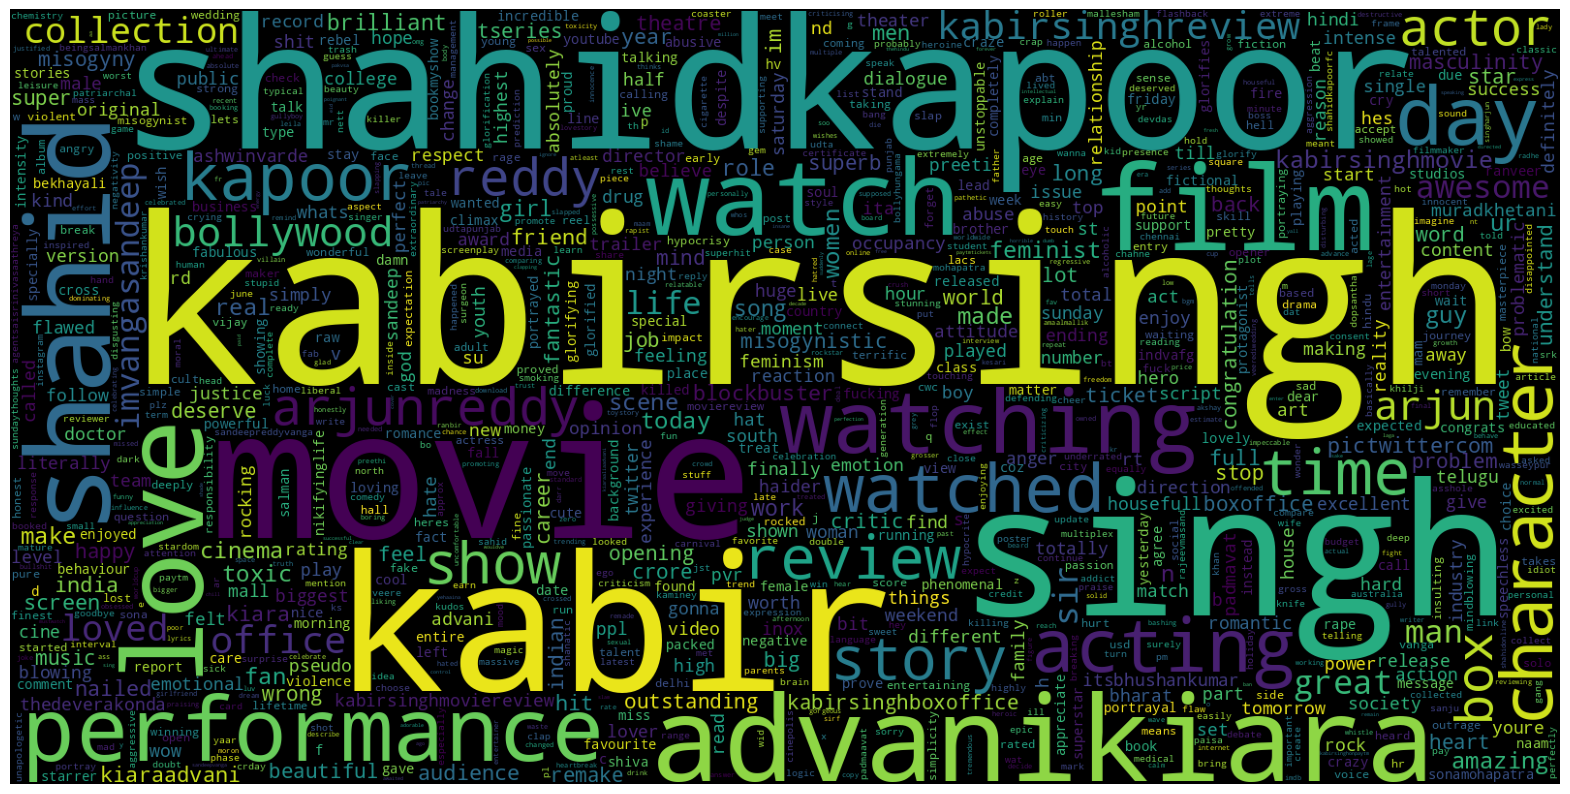

In [ ]:
from wordcloud import WordCloud
data = df3['Cleaned_English_Tweets']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data))
plt.imshow(wc)
plt.axis('off')
plt.show()

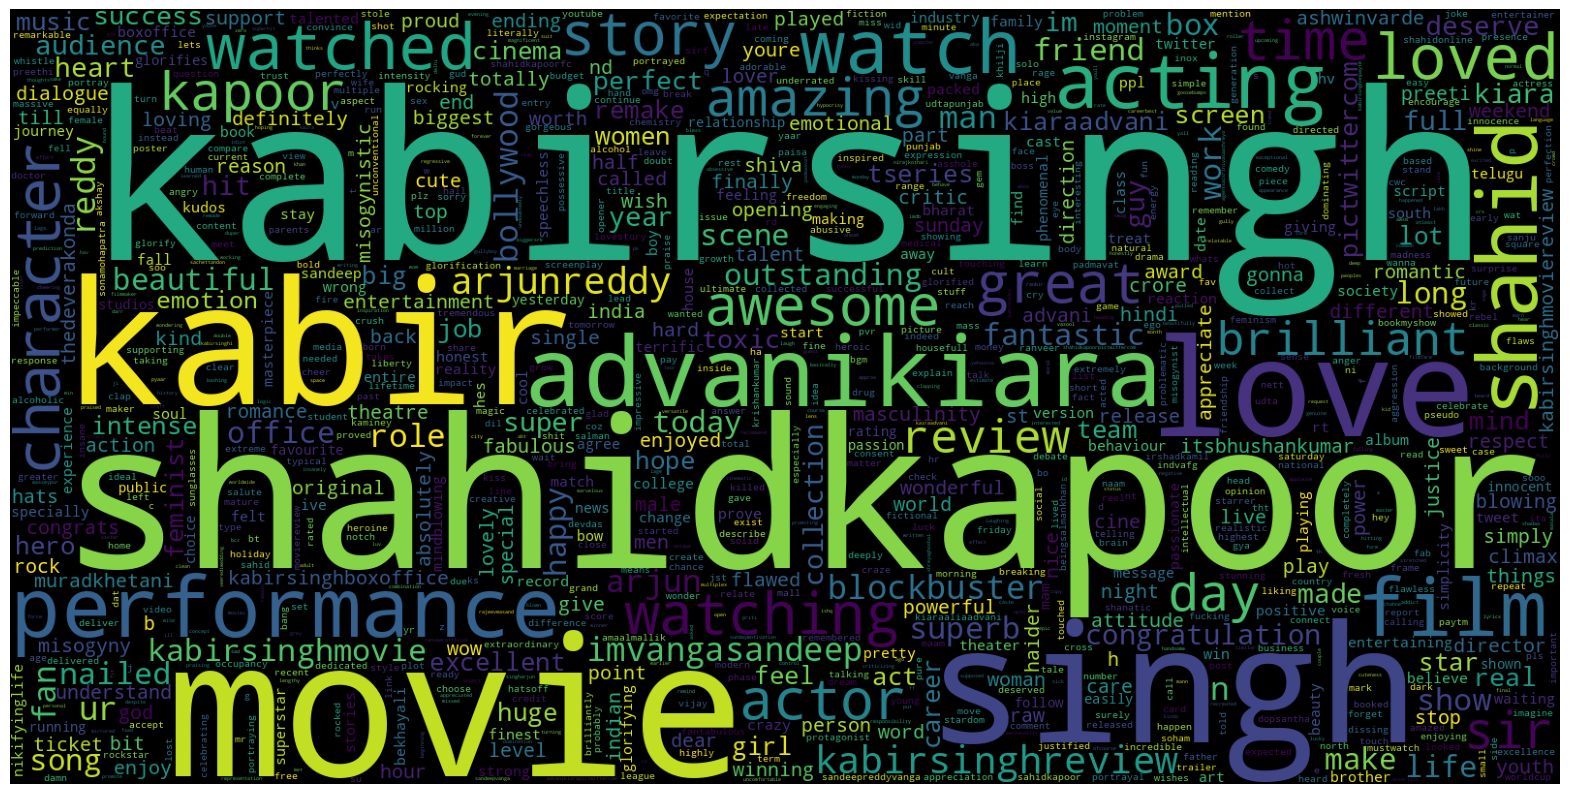

In [ ]:
data = df3[df3['overall_sentiment']=="positive"]['Cleaned_English_Tweets']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data))
plt.imshow(wc)
plt.axis('off')
plt.show()

from PIL import Image
import numpy as np
data = df3[df3['overall_sentiment'] == "positive"]['Cleaned_English_Tweets']
text = " ".join(data)
wordcloud = WordCloud(max_words=1000, width=1600, height=800, collocations=False).generate(text)
image = wordcloud.to_image()
image_array = np.array(image)
fig = go.Figure(data=go.Image(z=image_array))
fig.update_layout(title_text="Word Cloud - Positive Tweets", width=800, height=600)
fig.show()

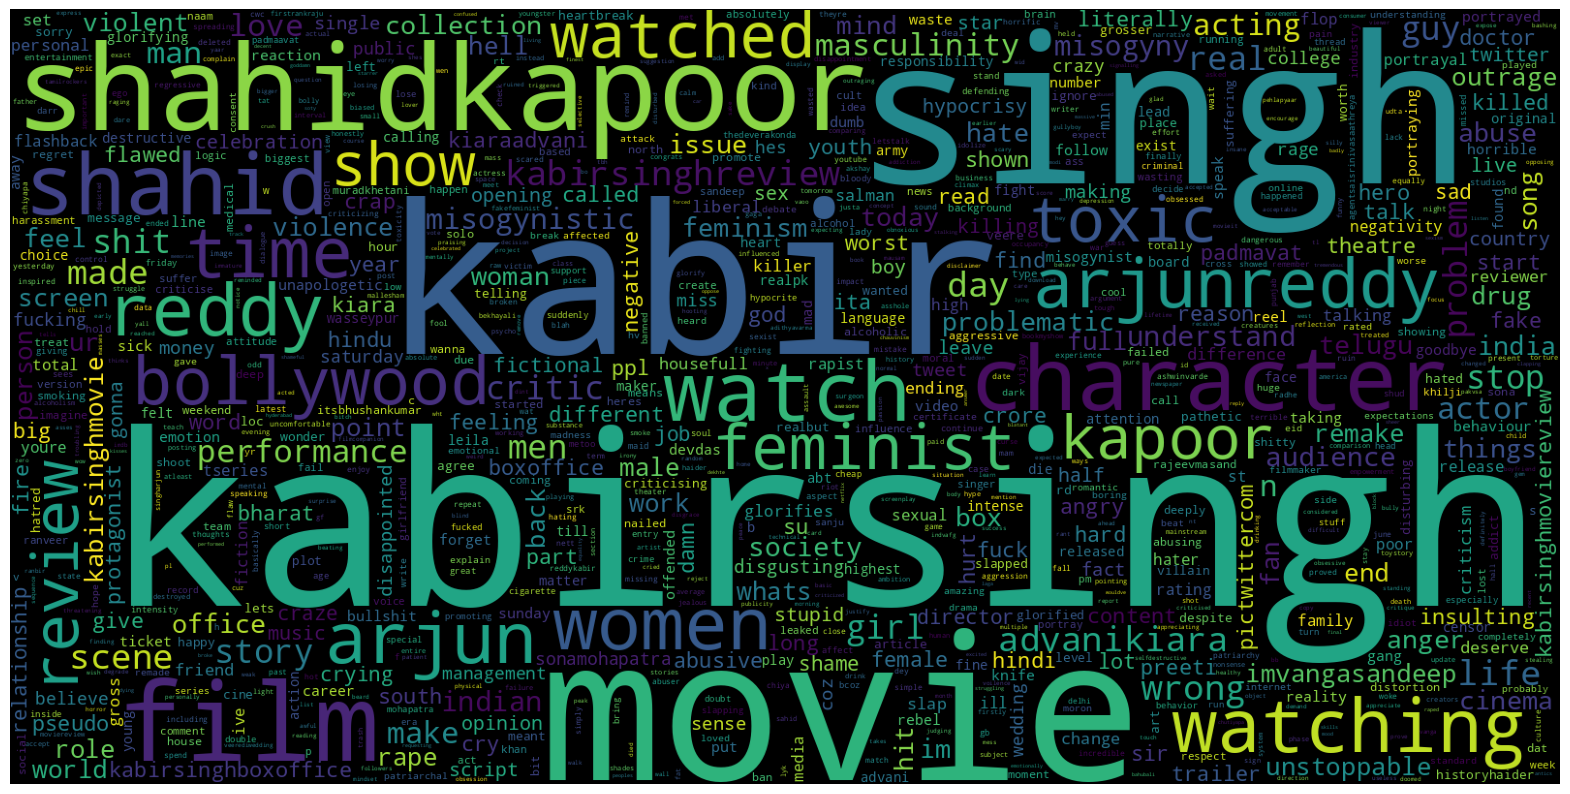

In [ ]:
data = df3[df3['overall_sentiment']=="negative"]['Cleaned_English_Tweets']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data))
plt.imshow(wc)
plt.axis('off')
plt.show()

from PIL import Image
import numpy as np
data = df3[df3['overall_sentiment'] == "negative"]['Cleaned_English_Tweets']
text = " ".join(data)
wordcloud = WordCloud(max_words=1000, width=1600, height=800, collocations=False).generate(text)
image = wordcloud.to_image()
image_array = np.array(image)
fig = go.Figure(data=go.Image(z=image_array))
fig.update_layout(title_text="Word Cloud - Negative Tweets", width=800, height=600)
fig.show()

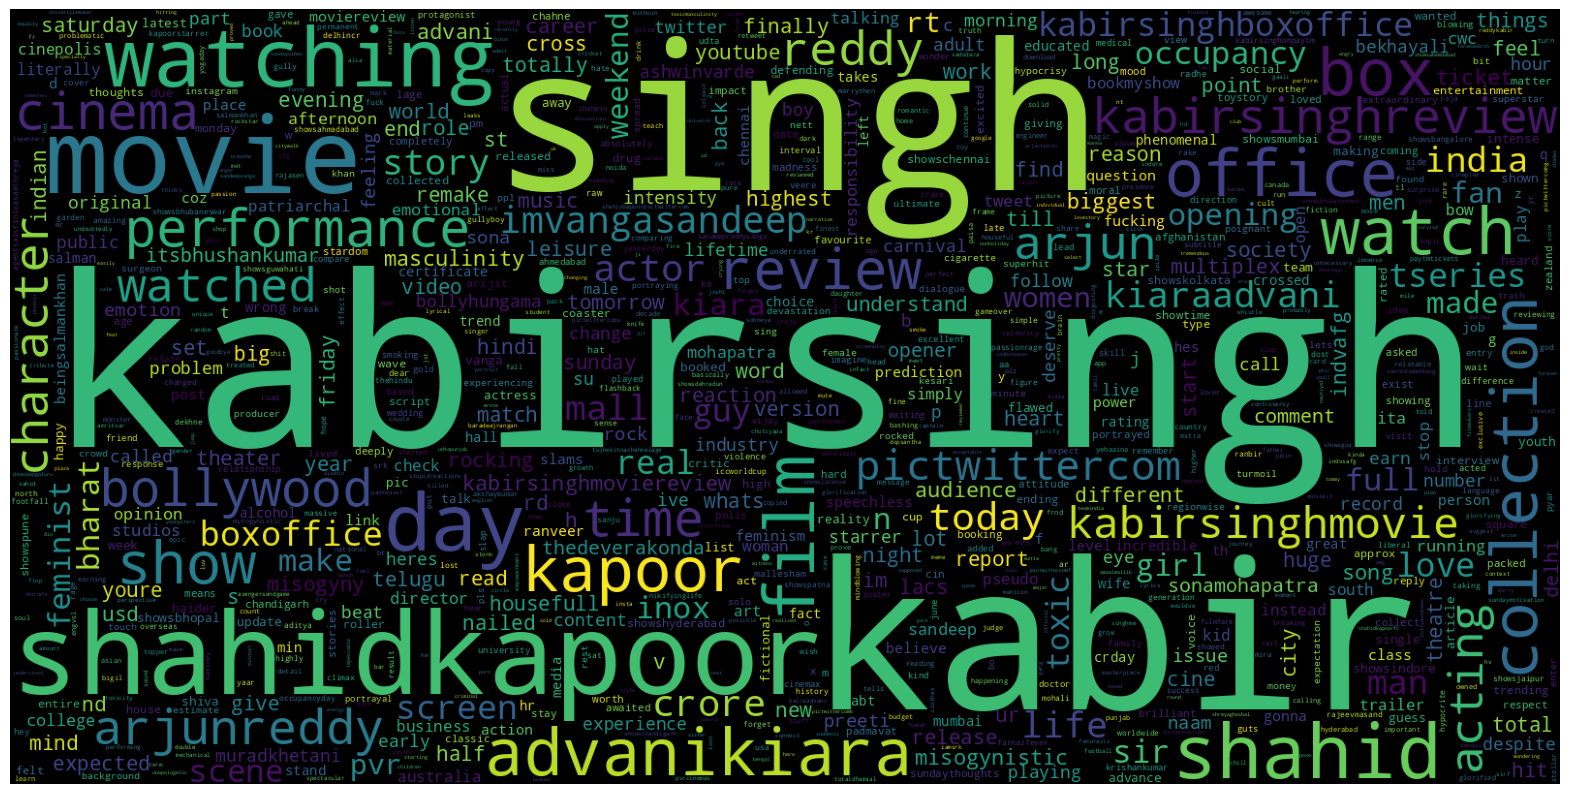

In [ ]:
data = df3[df3['overall_sentiment']=="neutral"]['Cleaned_English_Tweets']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data))
plt.imshow(wc)
plt.axis('off')
plt.show()

import numpy as np
data = df3[df3['overall_sentiment'] == "neutral"]['Cleaned_English_Tweets']
text = " ".join(data)
wordcloud = WordCloud(max_words=1000, width=1600, height=800, collocations=False).generate(text)
image = wordcloud.to_image()
image_array = np.array(image)
fig = go.Figure(data=go.Image(z=image_array))
fig.update_layout(title_text="Word Cloud - Neutral Tweets", width=800, height=600)
fig.show()

In [ ]:
df3

Cleaned_English_Tweets overall_sentiment
0     shahidkapoor love kabir kabirsingh superb movi...          positive
1     sweet teddy bear guy chicks magnet behave kabi...          positive
3     character kabir psychological treatment instea...          positive
4     advanikiara beautifulperson talented actor sim...          positive
5     ive bit searching found unwarranted hate ranve...          negative
...                                                 ...               ...
9995                    ps thread kabir singh men trash           neutral
9996  shahidkapoor kabirsinghmovie shahidkapoor set ...          positive
9997  movie kabirsingh obnoxious full misogyny toxic...          negative
9998  kabir singh movie review shahid kapoor kiara a...          positive
9999  twitter feminists kabirsingh day reportspictwi...           neutral

[8495 rows x 2 columns]

In [ ]:
x = df3['Cleaned_English_Tweets']
y = df3['overall_sentiment']

print(len(x), len(y))

8495 8495


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

6371 6371
2124 2124


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()
vect.fit(x_train)

CountVectorizer()

In [ ]:
x_train_dtm = vect.transform(x_train)
x_test_dtm = vect.transform(x_test)

In [ ]:
vect_tunned = CountVectorizer(stop_words='english', ngram_range=(1,2), min_df=0.1, max_df=0.7, max_features=100)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()

tfidf_transformer.fit(x_train_dtm)
x_train_tfidf = tfidf_transformer.transform(x_train_dtm)

x_train_tfidf

<6371x15997 sparse matrix of type '<class 'numpy.float64'>'
	with 80745 stored elements in Compressed Sparse Row format>

In [ ]:
texts = df3['Cleaned_English_Tweets']
target = df3['overall_sentiment']

In [ ]:
from keras.preprocessing.text import Tokenizer

In [ ]:
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(texts)

vocab_length = len(word_tokenizer.word_index) + 1
vocab_length

19372

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.tokenize import word_tokenize

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def embed(corpus):
    return word_tokenizer.texts_to_sequences(corpus)

longest_train = max(texts, key=lambda sentence: len(word_tokenize(sentence)))
length_long_sentence = len(word_tokenize(longest_train))

train_padded_sentences = pad_sequences(
    embed(texts),
    length_long_sentence,
    padding='post'
)

train_padded_sentences

array([[   4,    8,    2, ...,    0,    0,    0],
       [ 750, 6307, 2690, ...,    0,    0,    0],
       [  16,    2, 6309, ...,    0,    0,    0],
       ...,
       [   5,    1, 2040, ...,    0,    0,    0],
       [   2,    3,    5, ...,    0,    0,    0],
       [ 202,   78,    1, ...,    0,    0,    0]], dtype=int32)

In [ ]:
import numpy as np

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

# Train the model
nb.fit(x_train_dtm, y_train)

MultinomialNB()

In [ ]:
y_pred_class = nb.predict(x_test_dtm)
y_pred_prob = nb.predict_proba(x_test_dtm)[:, 1]

In [ ]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.6850282485875706


In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

pipe = Pipeline([('bow', CountVectorizer()),
                 ('tfid', TfidfTransformer()),
                 ('model', MultinomialNB())])

In [ ]:
pipe.fit(x_train, y_train)

y_pred_class = pipe.predict(x_test)

print(metrics.accuracy_score(y_test, y_pred_class))

0.6045197740112994


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)

In [ ]:
import xgboost as xgb

pipe = Pipeline([
    ('bow', CountVectorizer()),
    ('tfid', TfidfTransformer()),
    ('model', xgb.XGBClassifier(
        learning_rate=0.1,
        max_depth=7,
        n_estimators=80,
        use_label_encoder=False,
        eval_metric='auc',
    ))
])

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfid', TfidfTransformer()),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='auc',
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=7, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=80, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [ ]:
y_pred = pipe.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print('Test accuracy:', acc)

Test accuracy: 0.7374926427310182
